In [2]:
#from urllib2 import urlopen  # 파이썬 2의 경우 
from urllib.request import urlopen
from bs4 import BeautifulSoup
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from openpyxl import Workbook
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
#!pip install nltk

In [3]:
# NLTK, KoNLPy 설치 출처 : 딥러닝을 이용한 자연어 처리 입문 https://wikidocs.net/22488
# nltk 자연어 처리

import nltk
nltk.__version__

'3.6.2'

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from openpyxl import Workbook
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# 코엔엘파이(KoNLPy) : 한국어 자연어 처리를 위한 형태소 분석기 패키지 설치
!pip install konlpy

In [4]:
# openpyxl을 이용해 엑셀 파일로 저장하기 위한 준비 과정
excell = Workbook(write_only=True)
ws = excell.create_sheet()
ws.append(['score', 'title', 'writer', 'date', 'review', 'senti_score'])

In [5]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...


True

In [6]:
# 웹 페이지 불러오기
url = 'https://www.imdb.com/title/tt4154756/reviews?ref_=tt_ql_3'
print(url)
webpage = urlopen(url)
source = BeautifulSoup(webpage, 'html.parser', from_encoding='utf-8')

review_list = source.findAll('div', {'class': 'imdb-user-review'})

sid = SentimentIntensityAnalyzer()   # VADER 감정분석기 미리 준비

sum_review = ''   # wordcloud 띄워줄때 쓸 모든 리뷰 텍스트 다 합친 문자열


https://www.imdb.com/title/tt4154756/reviews?ref_=tt_ql_3


In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [9]:
# 각 리뷰마다...
for review in review_list:
    # 리뷰 내에서 태그, 클래스 이용해서 정보 뽑아내는 부분
    list1 = []
    score = review.find('span').get_text()
    title = review.find('a').get_text().replace('\n', '')
    writer = review.find('span', {'class': 'display-name-link'}).get_text()
    date = review.find('span', {'class': 'review-date'}).get_text()
    content = review.find('div', {'class': 'text show-more__control'}).get_text()

    # 엑셀 파일에 저장하기 위해 list에 각 정보를 추가

    list1.append(score)
    list1.append(title)
    list1.append(writer)
    list1.append(date)
    list1.append(content)
    sum_review = sum_review + content

    lines_list = tokenize.sent_tokenize(content)  # 리뷰 텍스트를 문장별로 쪼개는 전처리 함수

 

    sum = 0
    for sent in lines_list:  # 한 리뷰의 각 문장마다 감정 점수 계산 
        ss = sid.polarity_scores(sent)
        print(ss['compound'])
        sum = sum+ss['compound']
    sum1 = str(sum/len(lines_list))  # 문장들의 평균점수가 그 리뷰의 감정 점수
    list1.append(sum1)
    ws.append(list1)  # 지금까지 뽑아냈던 내용들을 openpyxl worksheet에 저장

excell.save('imdb_.xlsx')  # imdb_.xlsx라는 파일명으로 엑셀파일 저장

-0.7579
0.0
0.7964
0.2247
0.4215
0.0
0.5859
0.4404
0.2263
0.6705
0.4215
0.6369
0.6858
-0.5267
0.6369
0.0
0.836
-0.25
0.0
-0.3818
0.0
0.3818
0.0
0.7274
0.4767
0.7769
0.0
0.5859
0.0
0.0
0.0
0.1027
0.0
0.0
0.296
0.128
0.4019
0.6249
0.5411
0.1779
-0.6597
0.2846
-0.4875
0.2732
0.8664
0.4404
0.4926
0.8625
0.2023
0.9358
0.9402
0.7762
0.0
0.6249
0.4588
0.0
-0.5994
-0.636
0.5413
0.6948
-0.4767
0.2023
0.4019
0.3612
0.8979
0.0
0.6344
0.0
0.4588
-0.5106
0.9217
0.2732
-0.0541
-0.3818
0.0
0.6743
-0.7951
0.9592
0.0
0.7972
0.5719
0.7823
0.0772
0.0
0.0
0.5719
0.0
0.965
0.6369
0.6369
0.7089
0.5781
0.9226
-0.25
0.0
0.3089
-0.1548
0.6369
-0.296
-0.5719
0.7697
0.8316
0.8628
-0.7063
0.6249
0.8016
0.8519
0.4939
0.128
0.0
0.0
0.0
0.5574
0.8555
0.0807
-0.296
0.6792
-0.5267
0.7461
-0.3412
0.5719
0.2006
0.4391
0.6249
0.69
-0.8817
0.7787
0.4019
0.5423
0.34
-0.0503
0.5994
-0.1564
-0.7717
0.4357
0.2413
0.4767
-0.2846
0.2924
-0.3818
0.3818
0.0
0.7269
-0.3818
0.5719
-0.5423
0.0
0.7351
0.5719
-0.8481
0.743
0.0
0.0258


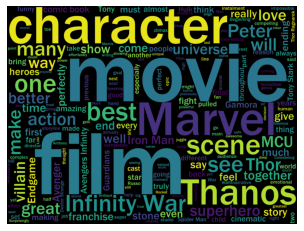

In [10]:
def generate_wordcloud(text):  # 워드클라우드 만드는 부분
    wordcloud = WordCloud(font_path='framd.ttf',
     width=2400, height=1800,
     ranks_only=None,
                          relative_scaling = 0.8,
                          stopwords = set(STOPWORDS)
                          ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()  # 화면에 띄워주기 위한 matplotlib 함수
generate_wordcloud(sum_review)